In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xgboost lightgbm catboost

# Load data (use your clean dataset)
df = pd.read_csv('diabetes_cleaned.csv') 

# Define features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

CatBoost Model Evaluation:
[[64 36]
 [ 7 47]]
              precision    recall  f1-score   support

           0       0.90      0.64      0.75       100
           1       0.57      0.87      0.69        54

    accuracy                           0.72       154
   macro avg       0.73      0.76      0.72       154
weighted avg       0.78      0.72      0.73       154



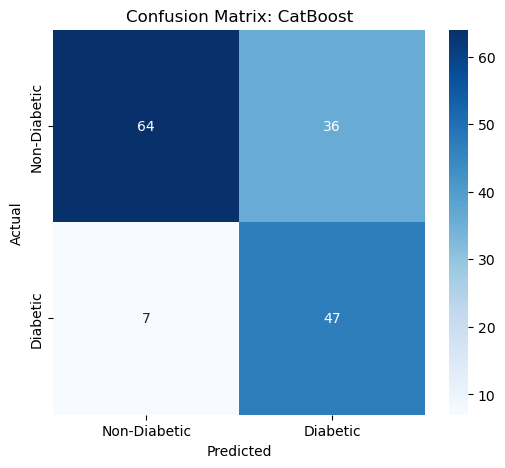

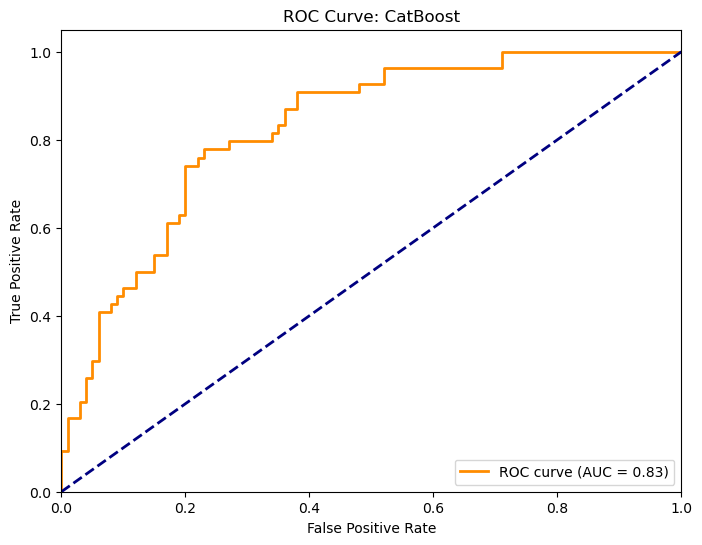

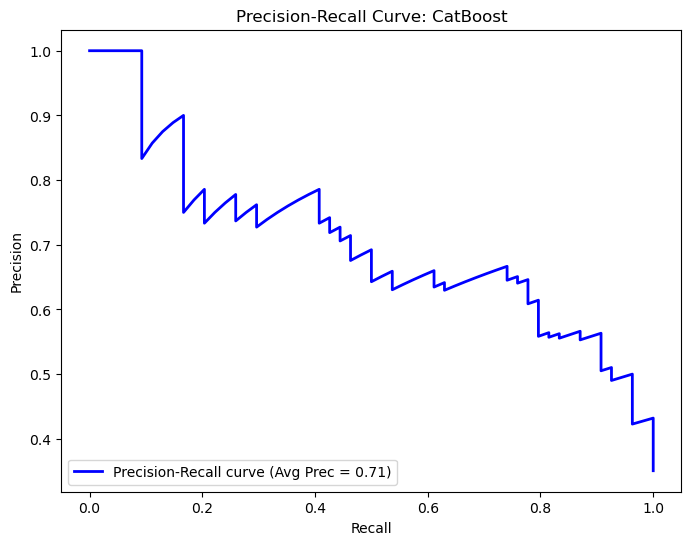

In [3]:
import catboost as cb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize CatBoost model
cat_model = cb.CatBoostClassifier(n_estimators=200, learning_rate=0.01, depth=3, scale_pos_weight=3, silent=True)

# Fit the model
cat_model.fit(X_train, y_train)

# Make predictions
y_pred_cat = cat_model.predict(X_test)
y_prob_cat = cat_model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Print Evaluation Metrics
print("CatBoost Model Evaluation:")
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

# Confusion Matrix
cm_cat = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix: CatBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_prob_cat)
roc_auc_cat = auc(fpr_cat, tpr_cat)
plt.figure(figsize=(8, 6))
plt.plot(fpr_cat, tpr_cat, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_cat:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: CatBoost')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
prec_cat, recall_cat, _ = precision_recall_curve(y_test, y_prob_cat)
avg_prec_cat = average_precision_score(y_test, y_prob_cat)
plt.figure(figsize=(8, 6))
plt.plot(recall_cat, prec_cat, color='b', lw=2, label=f'Precision-Recall curve (Avg Prec = {avg_prec_cat:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: CatBoost')
plt.legend(loc='lower left')
plt.show()


In [5]:
cat_model.save_model("model.cbm")
